<a href="https://colab.research.google.com/github/idrissdeme/Machine_Leaning-Python-UERJ-2022/blob/master/C%C3%B3pia_de_Sinal_neutron__MLP_MNIST_Keras_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**JUPYTER NOTEBOOK FOR A MLP LEARNING MNIST NEUTRON SIGNAL **

*   Item da lista
*   Item da lista



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from keras.utils import np_utils

**Define the network hyperparameters**

In [ ]:
# Trainign batch size 
batch_size = 128
# Number of training epochs
epochs = 50
# Fraction of the training data to be used as validation
val_split = 0.3
# Number of classes ( multi-classification )
nb_classes = 10
# Learning rate
lr=0.1


Reding binary data

In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth

from pydrive.drive import GoogleDrive

from google.colab import auth

from oauth2client.client import GoogleCredentials

auth.authenticate_user()

gauth = GoogleAuth()

gauth.credentials = GoogleCredentials.get_application_default()

drive = GoogleDrive(gauth)

fileDownloaded = drive.CreateFile({'id':'1MJBYDAGuoXgiurR6LwvnWIdPK1BmY7k-'})

fileDownloaded.GetContentFile('TRE286A - Cop.fon')

#import pandas as pd

#df = pd.read_table('TRE286A - Cop.fon', delimiter=';')

#df.head(8)

file = open("TRE286A - Cop.fon","rb")
print(file.read(8))
(X_train, y_train), (X_test, y_test) =file
file.close()



b'\xfb?\x87\xf9\xf2\x02\xd6?'


ValueError: ignored

**Load the MNIST dataset and format it for train and validation**

In [ ]:
# Load MNIST dataset (28x28 pixel images)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_Train = np_utils.to_categorical(y_train, nb_classes)
Y_Test = np_utils.to_categorical(y_test, nb_classes)


**Define the MLP achitecture using KERAS sequential API**

In [ ]:
# Multilayer Perceptron model
model = Sequential()
model.add(Dense(input_dim=784, activation="relu", units=100, kernel_initializer="normal"))
model.add(Dense(activation="relu", units=50, kernel_initializer="normal")) # after first layer no need to specify input_dim
model.add(Dense(activation="relu", units=25, kernel_initializer="normal")) # after first layer no need to specify input_dim
model.add(Dense(activation="sigmoid", units=10, kernel_initializer="normal"))
model.compile(optimizer=SGD(lr=lr), loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 10)                260       
                                                                 
Total params: 85,085
Trainable params: 85,085
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


**Train the MLP**

In [ ]:
# Train
history = model.fit(X_train, Y_Train, validation_split=val_split, epochs=epochs, batch_size=batch_size, verbose=1)


Epoch 1/50
329/329 [==============================] - 2s 4ms/step - loss: 0.1796 - accuracy: 0.1065 - val_loss: 0.0940 - val_accuracy: 0.1134
Epoch 2/50
329/329 [==============================] - 1s 4ms/step - loss: 0.0916 - accuracy: 0.1145 - val_loss: 0.0912 - val_accuracy: 0.1079
Epoch 3/50
329/329 [==============================] - 1s 4ms/step - loss: 0.0912 - accuracy: 0.1143 - val_loss: 0.0911 - val_accuracy: 0.1079
Epoch 4/50
329/329 [==============================] - 1s 4ms/step - loss: 0.0911 - accuracy: 0.1143 - val_loss: 0.0910 - val_accuracy: 0.1079
Epoch 5/50
329/329 [==============================] - 1s 4ms/step - loss: 0.0910 - accuracy: 0.1143 - val_loss: 0.0909 - val_accuracy: 0.1079
Epoch 6/50
329/329 [==============================] - 1s 4ms/step - loss: 0.0910 - accuracy: 0.1143 - val_loss: 0.0909 - val_accuracy: 0.1079
Epoch 7/50
329/329 [==============================] - 1s 4ms/step - loss: 0.0909 - accuracy: 0.1143 - val_loss: 0.0908 - val_accuracy: 0.1079
Epoch 

**Evaluate the MLP performance**

In [ ]:
# Evaluate
evaluation = model.evaluate(X_test, Y_Test, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.0256 - accuracy: 0.8528
Summary: Loss over the test dataset: 0.03, Accuracy: 0.85


**Plot the training and validation performances**

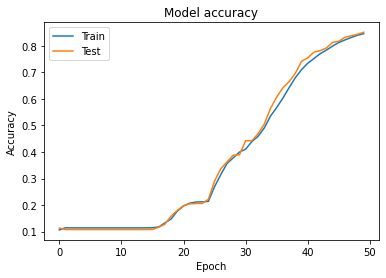

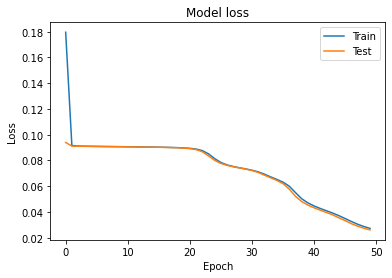

In [ ]:
# Training History Visualization

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

(10000, 10)


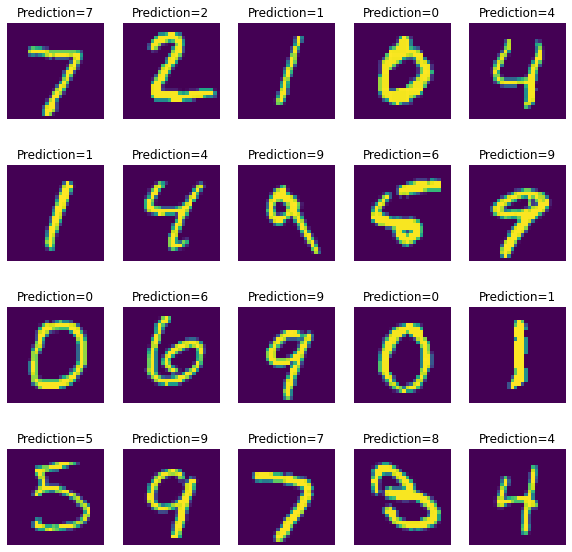

In [ ]:
Nplot = 20
plt.figure(figsize=(10,10))
Y = model.predict(X_test, batch_size=64)
#Y=model.predict(X_test) 
Y=Y*10.
print(Y.shape)
for n in range(Nplot):
  X=X_test[n,:]
  ax = plt.subplot(4, 5, n+1)
  plt.imshow(X.reshape(28,28))
  plt.axis('off')
  index = np.argmax(Y[n])
  plt.title('Prediction='+str(index))
plt.show()

**Exercises:**

---


**Question 1**: What happens if you increase/decrease the number of hidden layers?


**Question 2:** What happens if you increase/decrease the number of nodes per hidden layer?

**Question 3:** What happens if you increase/decrease the learning rate ?

**Question 4:** What happens if you increase/decrease the number of training epochs  ?

**Question 5:** What happens if you increase/decrease the training batch size ?

**Question 6:** What happens if you use the ReLU activation function in the hidden layers ?